# Competition 02 - The Christmas Predictor Challenge

Management Science - Retail Forecasting Competition

# Client Briefing: MegaMart Retail Chain

## Company Background

**MegaMart** is a major European retail chain with 250 stores across 8
countries. Founded in 1985, they’ve grown to €4.2B in annual revenue.
Their motto: “Everything you need, when you need it.”

**Your Role:** You’ve been hired as forecasting consultants for their
critical Christmas season planning.

## The Christmas Crisis

**Last Year’s Disaster:**

-   **Gaming Console X:** Sold out December 10th, missed €1.2M in sales
-   **Fitness Tracker Pro:** 500 units unsold, €150K clearance loss
-   **Smart Speaker Mini:** Perfect stock, but pure luck

**Operations Director:** “We can’t afford another Christmas like last
year. Every stockout means disappointed customers and lost revenue.
Every overstock means clearance losses and tied-up capital. We need
accurate forecasts!”

## The Challenge

### Your Mission

Forecast December 2025 sales (weeks 1-4) for three key products using 3
years of historical weekly data.

### The Three Products

#### 1. TechPod Pro (Wireless Earbuds)

-   **Category:** Consumer Electronics
-   **Price:** €199
-   **Margin:** €80 per unit
-   **Storage cost:** €2 per unit per week
-   **Lead time:** 3 weeks from supplier
-   **Last year:** Strong growth, some seasonality

#### 2. FitBand Ultra (Fitness Tracker)

-   **Category:** Health & Wellness
-   **Price:** €149
-   **Margin:** €55 per unit
-   **Storage cost:** €1.50 per unit per week
-   **Lead time:** 4 weeks from supplier
-   **Last year:** Volatile, New Year resolution spike

#### 3. CozyThrow Deluxe (Heated Blanket)

-   **Category:** Home & Living
-   **Price:** €79
-   **Margin:** €30 per unit
-   **Storage cost:** €3 per unit per week (bulky)
-   **Lead time:** 6 weeks from supplier
-   **Last year:** Highly seasonal, winter peak

### Success Metrics

Your forecasts will be evaluated on:

1.  **Accuracy (60%):** Mean Absolute Error (MAE) across all 12
    forecasts
2.  **Business Logic (20%):** Reasonable patterns, seasonality
    considered
3.  **Method Clarity (20%):** Clear explanation of approach

### Financial Impact

**Cost of Errors:**

-   **Underforecast:** Lost profit margin + customer disappointment
-   **Overforecast:** Storage costs + clearance losses (assume 30%
    markdown)

**Example:** If you forecast 1000 units but actual is 1200: - Lost
profit: 200 × €80 = €16,000 (for TechPod Pro)

# Data Access & Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# DON'T CHANGE ANYTHING BELOW!
# Random seed for consistency
np.random.seed(2025)

# Generate 3 years of realistic weekly sales data
weeks = pd.date_range(start='2023-01-03', end='2025-12-01', freq='W-MON')

def generate_product_sales(trend, seasonality_type, volatility, base=100):
    """Generate realistic sales patterns"""
    n_weeks = len(weeks)

    # Base trend
    if trend == 'growing':
        trend_component = np.linspace(base, base * 1.7, n_weeks)
    elif trend == 'stable':
        trend_component = np.ones(n_weeks) * base
    else:  # declining
        trend_component = np.linspace(base, base * 0.6, n_weeks)

    # Seasonality
    if seasonality_type == 'christmas':
        # Peak in December, low in summer
        seasonal = 1 + 0.5 * np.sin(2 * np.pi * (np.arange(n_weeks) - 45) / 52)
    elif seasonality_type == 'newyear':
        # Peak in January and December
        seasonal = 1 + 0.25 * np.cos(2 * np.pi * np.arange(n_weeks) / 52)
    else:  # moderate
        seasonal = 1 + 0.05 * np.sin(2 * np.pi * np.arange(n_weeks) / 52)

    # Combine with noise
    noise = np.random.normal(1, volatility, n_weeks)
    sales = trend_component * seasonal * noise

    # Ensure positive values
    sales = np.maximum(sales, base * 0.2)

    return sales.astype(int)

# Generate sales for each product
techpod_sales = generate_product_sales('growing', 'moderate', 0.1, base=250)
fitband_sales = generate_product_sales('stable', 'newyear', 0.25, base=180)
cozythrow_sales = generate_product_sales('stable', 'christmas', 0.15, base=120)

# Create the historical data DataFrame
historical_data = pd.DataFrame({
    'week': weeks,
    'techpod_pro': techpod_sales,
    'fitband_ultra': fitband_sales,
    'cozythrow_deluxe': cozythrow_sales
})

print("Historical sales data loaded!")
print(f"Data period: {historical_data['week'].min().date()} to {historical_data['week'].max().date()}")
print(f"Total weeks: {len(historical_data)}")
print("\nFirst few weeks:")
print(historical_data.head())
print("\nLast few weeks (November 2023):")
print(historical_data.tail(6))
# DON'T CHANGE ANYTHING ABOVE!

Historical sales data loaded!
Data period: 2023-01-09 to 2025-12-01
Total weeks: 152

First few weeks:
        week  techpod_pro  fitband_ultra  cozythrow_deluxe
0 2023-01-09          247            267               155
1 2023-01-16          271            215               150
2 2023-01-23          218            239               200
3 2023-01-30          240            194               168
4 2023-02-06          257            306               158

Last few weeks (November 2023):
          week  techpod_pro  fitband_ultra  cozythrow_deluxe
146 2025-10-27          380            131                82
147 2025-11-03          371            157               107
148 2025-11-10          394            173               136
149 2025-11-17          332            206               103
150 2025-11-24          448            217               116
151 2025-12-01          432            154               139

## Data Exploration Tools

Product Statistics (weekly sales):
----------------------------------------

TECHPOD_PRO:
  Average: 333 units/week
  Std Dev: 58 units
  Range: 218 - 489 units

FITBAND_ULTRA:
  Average: 179 units/week
  Std Dev: 54 units
  Range: 75 - 345 units

COZYTHROW_DELUXE:
  Average: 118 units/week
  Std Dev: 48 units
  Range: 50 - 244 units

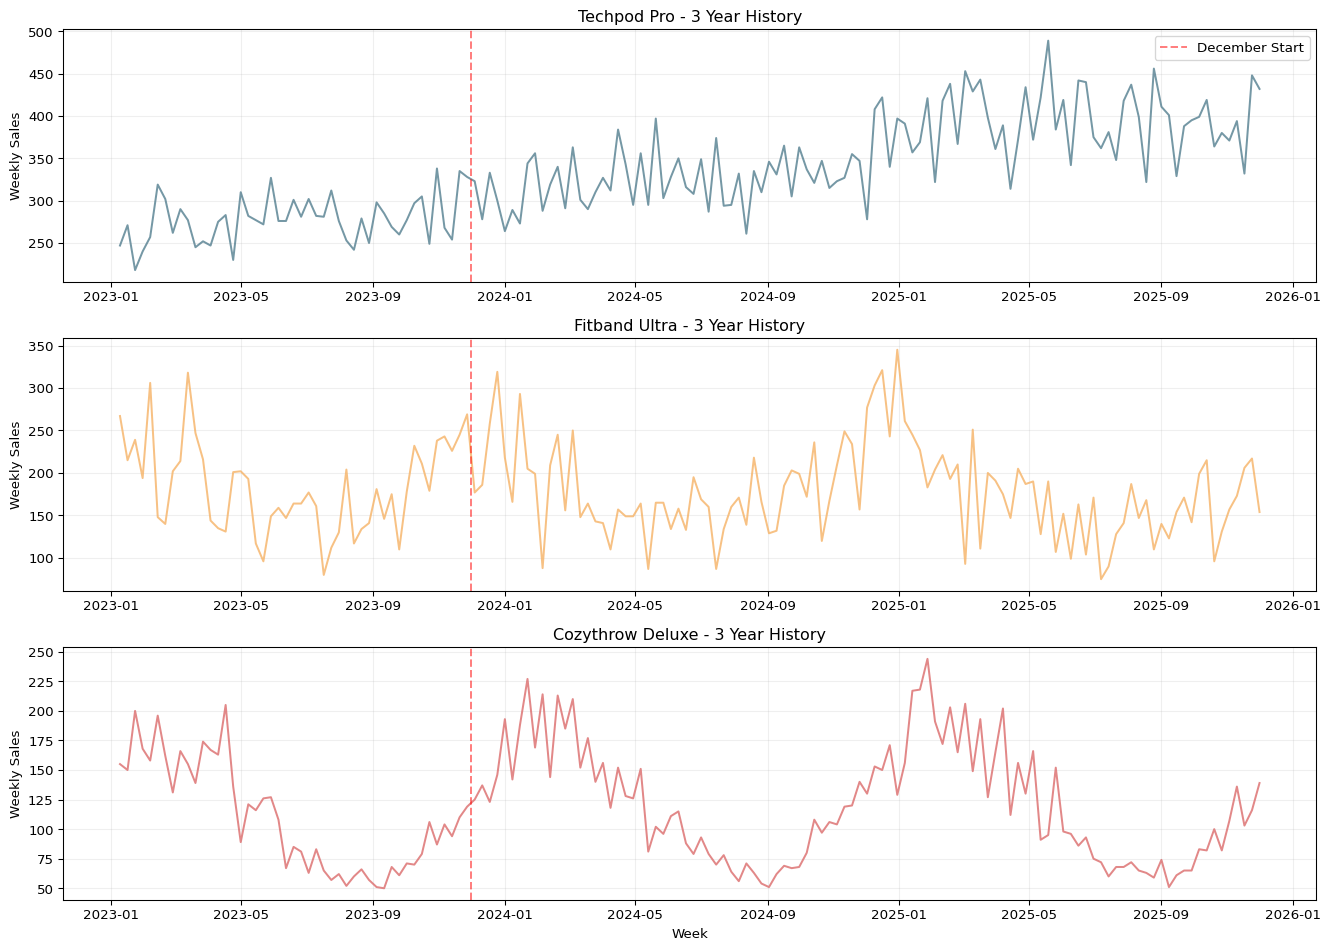

In [2]:
# Quick statistics
print("Product Statistics (weekly sales):")
print("-" * 40)
for product in ['techpod_pro', 'fitband_ultra', 'cozythrow_deluxe']:
    mean_sales = historical_data[product].mean()
    std_sales = historical_data[product].std()
    max_sales = historical_data[product].max()
    min_sales = historical_data[product].min()
    print(f"\n{product.upper()}:")
    print(f"  Average: {mean_sales:.0f} units/week")
    print(f"  Std Dev: {std_sales:.0f} units")
    print(f"  Range: {min_sales} - {max_sales} units")

# Visualize the full history
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

products = ['techpod_pro', 'fitband_ultra', 'cozythrow_deluxe']
colors = ['#537E8F', '#F6B265', '#DB6B6B']

for idx, (product, color) in enumerate(zip(products, colors)):
    axes[idx].plot(historical_data['week'], historical_data[product],
                   color=color, linewidth=1.5, alpha=0.8)
    axes[idx].set_ylabel('Weekly Sales')
    axes[idx].set_title(f'{product.replace("_", " ").title()} - 3 Year History')
    axes[idx].grid(True, alpha=0.2)
    axes[idx].axvline(x=pd.Timestamp('2023-12-01'), color='red',
                      linestyle='--', alpha=0.5, label='December Start')
    if idx == 0:
        axes[idx].legend()

axes[-1].set_xlabel('Week')
plt.tight_layout()
plt.show()

## December Weeks to Forecast

In [3]:
# Define the December 2025 weeks we need to forecast (exactly 4 weeks)
december_weeks = pd.date_range(start='2025-12-01', periods=4, freq='W-MON')
print("December 2025 weeks to forecast:")
for i, week in enumerate(december_weeks, 1):
    print(f"  Week {i}: {week.date()} (Monday start)")

# Create a template for your submission
forecast_template = pd.DataFrame({
    'week': december_weeks,
    'week_num': [1, 2, 3, 4],
    'techpod_pro': [0, 0, 0, 0],        # Your forecasts here
    'fitband_ultra': [0, 0, 0, 0],      # Your forecasts here
    'cozythrow_deluxe': [0, 0, 0, 0]    # Your forecasts here
})

print("\nForecast template (you'll fill this):")
print(forecast_template)

print("\nExample: How to fill your forecasts:")
print("  forecast_template.loc[0, 'techpod_pro'] = your_week1_forecast")
print("  forecast_template.loc[1, 'techpod_pro'] = your_week2_forecast")
print("  ... and so on for all products and weeks")

December 2025 weeks to forecast:
  Week 1: 2025-12-01 (Monday start)
  Week 2: 2025-12-08 (Monday start)
  Week 3: 2025-12-15 (Monday start)
  Week 4: 2025-12-22 (Monday start)

Forecast template (you'll fill this):
        week  week_num  techpod_pro  fitband_ultra  cozythrow_deluxe
0 2025-12-01         1            0              0                 0
1 2025-12-08         2            0              0                 0
2 2025-12-15         3            0              0                 0
3 2025-12-22         4            0              0                 0

Example: How to fill your forecasts:
  forecast_template.loc[0, 'techpod_pro'] = your_week1_forecast
  forecast_template.loc[1, 'techpod_pro'] = your_week2_forecast
  ... and so on for all products and weeks

# Starter Code & Helper Functions

In [4]:
def calculate_mae(actual, forecast):
    """Calculate Mean Absolute Error"""
    return np.mean(np.abs(actual - forecast))

def calculate_mape(actual, forecast):
    """Calculate Mean Absolute Percentage Error"""
    return np.mean(np.abs((actual - forecast) / actual)) * 100

def simple_moving_average(data, window):
    """Calculate simple moving average forecast"""
    return data.iloc[-window:].mean()

def seasonal_naive(data, season_length=52):
    """Forecast based on same week last year"""
    if len(data) < season_length:
        return data.iloc[-1]  # Fallback to last value
    return data.iloc[-season_length]

print("Helper functions loaded!")
print("\nAvailable functions:")
print("  - calculate_mae(actual, forecast)")
print("  - simple_moving_average(data, window)")
print("  - seasonal_naive(data, season_length)")

Helper functions loaded!

Available functions:
  - calculate_mae(actual, forecast)
  - simple_moving_average(data, window)
  - seasonal_naive(data, season_length)

## Example: Basic Forecast Implementation

In [5]:
# Example forecast for TechPod Pro using simple moving average
print("Example Forecast: TechPod Pro")
print("-" * 40)

# Method 1: Simple 4-week moving average
techpod_ma4 = simple_moving_average(historical_data['techpod_pro'], window=4)
print(f"4-week MA forecast: {techpod_ma4:.0f} units/week")

# Method 2: Same week last year
techpod_seasonal = seasonal_naive(historical_data['techpod_pro'], season_length=52)
print(f"Last year same week: {techpod_seasonal:.0f} units/week")

print("\nYou can use any of these methods or create your own!")

Example Forecast: TechPod Pro
----------------------------------------
4-week MA forecast: 402 units/week
Last year same week: 408 units/week

You can use any of these methods or create your own!

# Your Task

## Step 1: Analyze Each Product

Study the patterns, trends, and seasonality for each product. Consider:

-   Is there a clear trend (growing/declining)?
-   Is there seasonality? When are the peaks?
-   How volatile is the demand?
-   What happened last December?

## Step 2: Choose Your Methods

Select appropriate forecasting methods for each product. You might use:

-   Different methods for different products
-   Combination of methods
-   Adjusted forecasts based on December patterns
-   Your own creative approach

## Step 3: Generate Forecasts

Create your forecasts for the 4 December weeks for each product.

In [6]:
# YOUR SOLUTION HERE
# This is where you'll implement your forecasting approach

# Step 1: Analyze patterns (add your analysis code)

# Step 2: Choose and implement methods

# Step 3: Generate December forecasts

# Step 4: Validate your forecasts are reasonable

## Step 4: Create Your Submission

Prepare a one-slide presentation (PDF) containing:

1.  **Your Forecasts:** Clear visualization of all 12 predictions
2.  **Method Summary:** 2-3 sentences explaining your approach
3.  **Key Insights:** What patterns did you find?
4.  **Confidence Level:** How confident are you in these forecasts?

# Tips for Success

## Strategy Suggestions

1.  **Start Simple:** Get a baseline forecast working first
2.  **Look for Patterns:** December might be special for some products
3.  **Consider Product Types:** Electronics vs. seasonal items behave
    differently
4.  **Validate Reasonableness:** Do your forecasts make business sense?

## Common Pitfalls

-   Using the same method for all products without considering their
    differences
-   Ignoring obvious seasonality
-   Forecasts way outside historical ranges without justification
-   Overly complex methods when simple ones work better

## Final Checklist

-   [ ] All 12 forecasts completed (3 products × 4 weeks)
-   [ ] Forecasts seem reasonable given history
-   [ ] One-slide PDF ready for presentation

# Bonus Analysis (Optional)

For extra insights, consider:

In [7]:
# Calculate potential financial impact
def calculate_financial_impact(forecast, actual, margin, storage_cost):
    """Calculate the cost of forecast error"""
    error = actual - forecast
    if error > 0:  # Underforecast
        lost_profit = error * margin
        return -lost_profit  # Negative = loss
    else:  # Overforecast
        excess = -error
        storage_weeks = 4  # Assume stored for a month
        storage = excess * storage_cost * storage_weeks
        markdown_loss = excess * margin * 0.3  # 30% markdown
        return -(storage + markdown_loss)

# Example calculation
forecast = 1000
actual = 1200
impact = calculate_financial_impact(forecast, actual, margin=80, storage_cost=2)
print(f"Financial impact of error: €{-impact:,.0f} loss")

# Good Luck!